In [1]:
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.decomposition import PCA
from sklearn import preprocessing

warnings.filterwarnings('ignore')

# Data load and pre-processing


In [2]:
min_max_scaler = preprocessing.MinMaxScaler()

#################
# load data sales
#################
path_sales = "/mnt/c/Users/T828808/Study/AUT/COMP809/Ass2/Sales_Transactions_Dataset_Weekly.csv"
rawdata_sales = pandas.read_csv(path_sales)
# categorise everything and create array
list_of_columns_sales = rawdata_sales.columns
rawdata_sales[list_of_columns_sales] = rawdata_sales[list_of_columns_sales].apply(lambda col:pandas.Categorical(col).codes)
# Create array
array_sales = rawdata_sales.values
predictors_sales = array_sales[:, 0:107]
# Print some stats
print(rawdata_sales.shape)
print(rawdata_sales.head())

#################
# load data seoul
#################
path_seoul = "/mnt/c/Users/T828808/Study/AUT/COMP809/Ass2/SeoulBikeData.csv"
rawdata_seoul = pandas.read_csv(path_seoul)
# categorise everything and create array
list_of_columns_seoul = rawdata_seoul.columns
rawdata_seoul[list_of_columns_seoul] = rawdata_seoul[list_of_columns_seoul].apply(lambda col:pandas.Categorical(col).codes)
# Create array
array_seoul = rawdata_seoul.values
predictors_seoul = array_seoul[:, 0:14]
# Print some stats
print(rawdata_seoul.shape)
print(rawdata_seoul.head())

#################
# load data water
#################
path_water = "/mnt/c/Users/T828808/Study/AUT/COMP809/Ass2/water-treatment.data"
rawdata_water = pandas.read_csv(path_water)
rawdata_water.columns = ['DATE','Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E','PH-P','DBO-P','SS-P','SSV-P','SED-P','COND-P','PH-D','DBO-D','DQO-D','SS-D','SSV-D','SED-D','COND-D','PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S','RD-DBO-P','RD-SS-P','RD-SED-P','RD-DBO-S','RD-DQO-S','RD-DBO-G','RD-DQO-G','RD-SS-G','RD-SED-G']
# categorise everything and create array
list_of_columns_water = rawdata_water.columns
rawdata_water[list_of_columns_water] = rawdata_water[list_of_columns_water].apply(lambda col:pandas.Categorical(col).codes)
# Create array
array_water = rawdata_water.values
predictors_water = array_water[:, 0:39]
# Print some stats
print(rawdata_water.shape)
print(rawdata_water.head())

(811, 107)
   Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0             0  11  12  10   8  13  12  14  21   6  ...              3   
1           111   7   6   3   2   7   1   6   3   3  ...             17   
2           222   7  11   8   9  10   8   7  13  12  ...             24   
3           331  12   8  13   5   9   6   9  13  13  ...             37   
4           442   8   5  13  11   6   7   9  14   9  ...             24   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0             20             26             35             46              0   
1             38             47              7              6             35   
2             83             16             15             32             40   
3             45              4              9             20             30   
4             51             25             56             16             15   

   Normalized 48  Normalized 49  Normalized 50  Normalize

# Feature importance

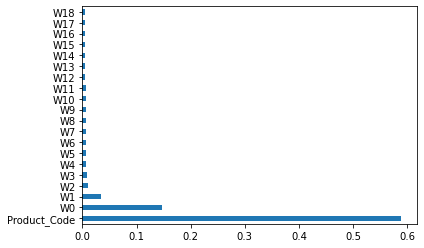

In [3]:
#################
# Sales
#################
# Run PCA
pca_sales = PCA()
pca_fit_sales = pca_sales.fit(predictors_sales)
# summarize components
feat_importances_sales = pandas.Series(pca_fit_sales.explained_variance_ratio_, index=rawdata_sales.columns)
feat_importances_sales.nlargest(20).plot(kind='barh')
# Get only the first two components as they explain almost all of the variance
pca_sales = PCA(n_components=2)
pca_fit_sales = pca_sales.fit(predictors_sales)
pca_data_sales = rawdata_sales[['W0','W1','Product_Code']]

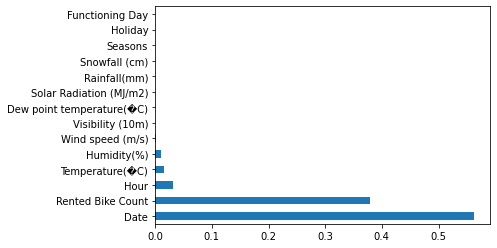

In [4]:

#################
# Seoul
#################
# Run PCA
pca_seoul = PCA()
pca_fit_seoul = pca_seoul.fit(predictors_seoul)
# summarize components
feat_importances_seoul = pandas.Series(pca_fit_seoul.explained_variance_ratio_, index=rawdata_seoul.columns)
feat_importances_seoul.nlargest(20).plot(kind='barh')
# Get only the first two components as they explain almost all of the variance
pca_seoul = PCA(n_components=2)
pca_fit_seoul = pca_seoul.fit(predictors_seoul)
pca_data_seoul = rawdata_seoul[['Hour','Rented Bike Count','Date','Temperature(�C)']]

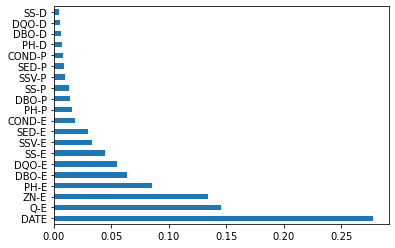

In [5]:
#################
# Water
#################
# Run PCA
pca_water = PCA()
pca_fit_water = pca_water.fit(predictors_water)
# summarize components
feat_importances_water = pandas.Series(pca_fit_water.explained_variance_ratio_, index=rawdata_water.columns)
feat_importances_water.nlargest(20).plot(kind='barh')
# Get only the first two components as they explain almost all of the variance
pca_water = PCA(n_components=2)
pca_fit_water = pca_water.fit(predictors_water)
pca_data_water = rawdata_water[['DATE','Q-E','ZN-E','PH-E','DBO-E']]

# Clustering

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
sales
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
n_clusters =  2
For n_clusters = 2 The average silhouette_score is : 0.35714256858302806
For n_clusters = 2 The average SSE is : 27.772162712889894
--- 0.346055269241333 seconds ---
n_clusters =  3
For n_clusters = 3 The average silhouette_score is : 0.35714256858302806
For n_clusters = 3 The average SSE is : 27.772162712889894
--- 0.23154139518737793 seconds ---
n_clusters =  4
For n_clusters = 4 The average silhouette_score is : 0.35714256858302806
For n_clusters = 4 The average SSE is : nan
--- 0.17214298248291016 seconds ---
n_clusters =  5
For n_clusters = 5 The average silhouette_score is : 0.35714256858302806
For n_clusters = 5 The average

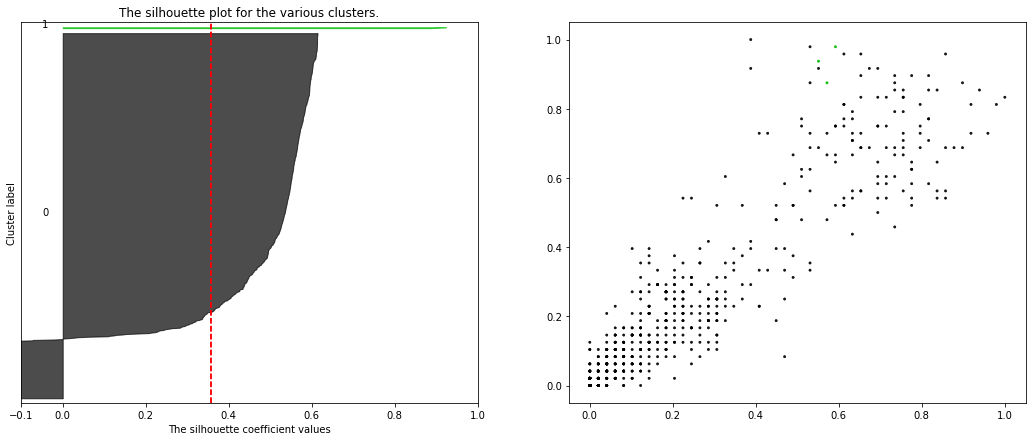

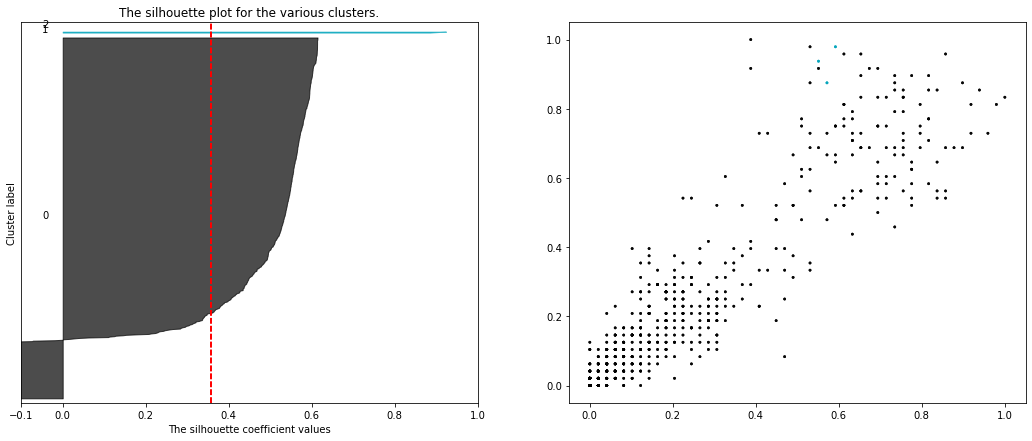

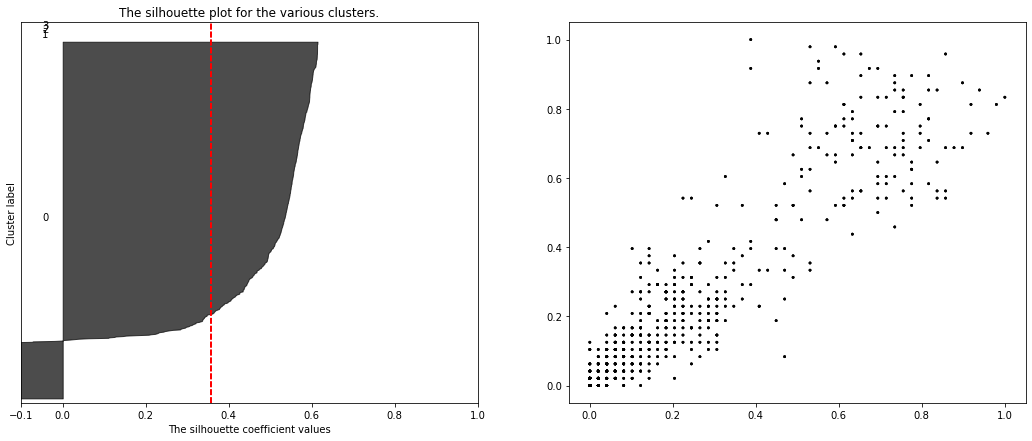

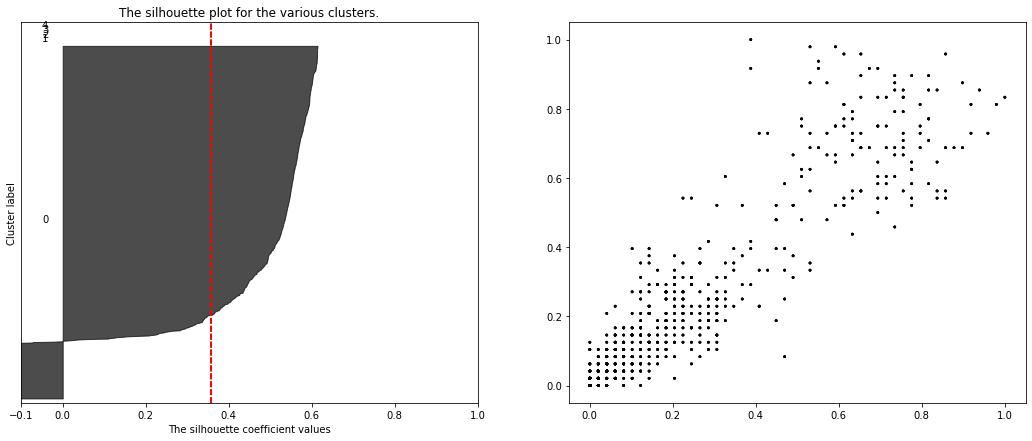

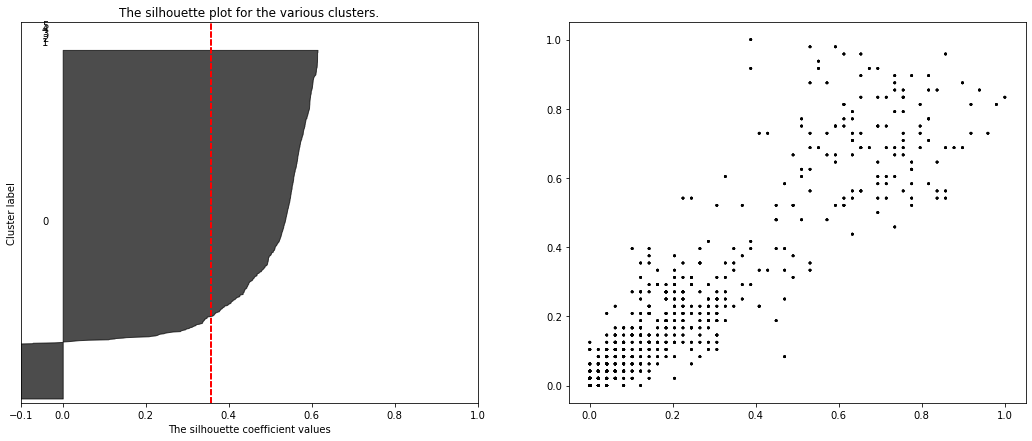

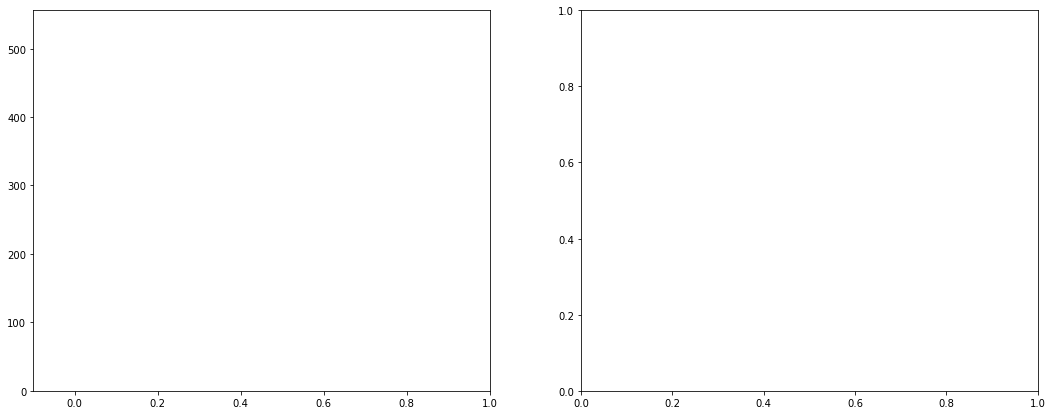

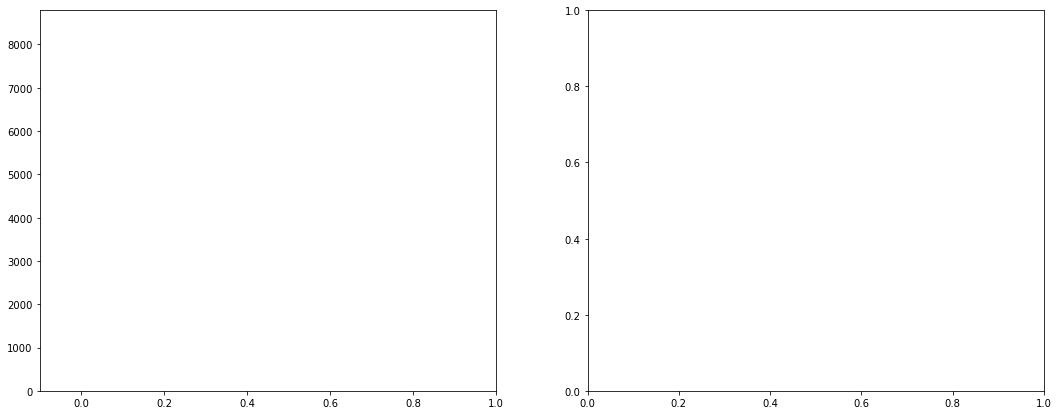

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import time


def do_sse(X, cluster_labels, n_clusters, model):
    cluster_centers = [X[cluster_labels == i].mean(axis=0) for i in range(n_clusters)]
    clusterwise_sse = [0, 0, 0, 0, 0, 0]
    for point, label in zip(X, cluster_labels):
        clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    clusterwise_sse_avg = np.mean(clusterwise_sse)
    return clusterwise_sse_avg

def do_cluster_analysis(name):    
    
    # To find out the optimal number of clusters we can search through range of clusters.
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        
        print('====================================================================================')
        print('n_clusters = ', n_clusters)
        print('====================================================================================')
        start_time = time.time()        
        
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        # but in this example code all lie within [-0.1, 1]

        ax1.set_xlim([-0.1, 1])

        # # The (n_clusters+1)*10 is for inserting blank space between
        # silhouette plots of individual clusters, to demarcate them
        # clearly.

        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        #Apply DBSCAN and set the EPS
        eps = 0
        if name == 'sales': 
            eps = 0.2
        elif name == 'water':
            eps = 0.3
        elif name == 'seoul':
            eps = 0.1 
        clusterer = DBSCAN(eps, min_samples=n_clusters, metric='euclidean')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the
        # samples.This gives a perspective into the density and
        # separation of the formed clusters

        try:
            silhouette_avg = silhouette_score(X, cluster_labels)
            # ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
            # Print the values
            # ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
            print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
            print("For n_clusters =", n_clusters, "The average SSE is :", do_sse(X, clusterer.labels_, n_clusters, clusterer))
        except:
            print('DBSCAN EXCEPTION')     
            break

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10      
        
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them

            # ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
            # Create the plot
            # ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)

            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color,
                              alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the
            # middle

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot

            y_lower = y_upper + 10  # 10 for the 0 samples
            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the
            # values

            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(X[:, 0],
                        X[:, 1],
                        marker='.',
                        s=30,
                        lw=0,
                        alpha=0.7,
                        c=colors,
                        edgecolor='k')

            # Labeling the clusters by centers
            centers = clusterer.labels_
        
        # Time to run
        print("--- %s seconds ---" % (time.time() - start_time))

#################
# Sales
#################
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('sales')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
X = pca_data_sales
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = x_scaled
do_cluster_analysis('sales')

#################
# Water
#################
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('water')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
X = pca_data_water
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = x_scaled
do_cluster_analysis('water')

#################
# Seoul
#################
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('seoul')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
print('||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||')
X = pca_data_seoul
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = x_scaled
do_cluster_analysis('seoul')